In [2]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

def create_genes(dimensions=2, space=10):
    """Creates a list with N random elements normally distributed

    Args:
        dimensions (int, optional): Number of genes. Defaults to 2.
        space (int, optional): Average of the random generated values. Defaults to 10.

    Returns:
        array: Array n*1 with the genes
    """

    genes = space*np.random.rand(dimensions)
    return genes


def calc_fitness(genes, func=None):
    """Calculates the fitness of the genes

    Args:
        genes (array): Array with the genes
        func (int): Integer to look the function

    Raises:
        ValueError: If the fitness function is not found

    Returns:
        double: fitness value of the function
    """

    func_list =  ["sphere","rosenbrock", "rastring"]
    func = func_list[func]
    if func not in ["sphere", "rosenbrock", "rastring"]:
        raise ValueError("Fitness function not recognized")
    # Fitnessfunktion ist die Multiplikation aller N Elemente
    if func == "sphere":
        fitness = np.dot(genes, genes)
        return fitness

    if func == "rosenbrock":
        fitness = 0
        for i in range(len(genes) - 1):
            x = genes[i]
            y = genes[i + 1]
            fitness += 100 * (x * x - y) ** 2 + (x - 1) ** 2
        return fitness

    if func == "rastring":
        a = 10
        n = len(genes)
        fitness = a * n
        for i in range(n):
            x = genes[i]
            fitness += x * x - a * np.cos(2 * np.pi * x) # wikipedia says minus!!
        return fitness

class Organism(object):
    """General data class to store information
    """

    def __init__(self, genes=None, sigma=None,func=None, generation = None) -> None:
        self.genes = genes
        self.sigma = sigma
        self.func = func
        self.fitness = None
        self.generation = generation
        if genes is not None:
            
            self.calc_fitness()

    
    def calc_fitness(self):
        """Calculates the fitness of the genes
        """
        self.fitness=calc_fitness(genes=self.genes, func = self.func)

Use of multi recombination (u/u, lambda), where it is a mix of all the population


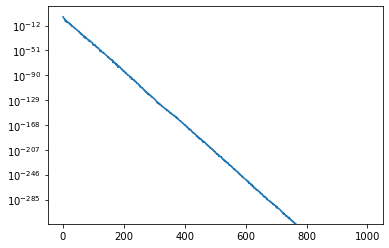

In [12]:
ITERATIONS = 1000 #100, 1000
GENOMES = 2  # N
METHOD = 0  # ["sphere","rosenbrock", "rastring"]
LAMDA = 250
SIGMA_START = 1
MU = 60 #mu = LAMBDA/4 >= 125*N
#1 given tau = 1/sqrt(N)
tau = 1/np.sqrt(GENOMES)

sigma_vector = np.full(GENOMES, SIGMA_START)
# Initialize the data saving
parents = []
for _ in range(MU):
    parent_genes = create_genes(dimensions=GENOMES,space=10)
    parent = Organism(genes = parent_genes, sigma = sigma_vector, func = METHOD)
    parents.append(parent)

parent.calc_fitness()
parent_list = [parent.genes]
fitness_list = [parent.fitness]
sigma_list = [parent.sigma]

for iter in range(ITERATIONS):
    child_list = []
    for k in range(LAMDA):
        #psi_k = tau*RAND(0,1)
        psi_k = tau*np.random.randn()
        
        tau_i = 1/(GENOMES)**0.25

        psy_k_vec = tau_i*np.random.randn(GENOMES)
        #z_k = VECTOR -> RAND(0,1)
        z_k = np.random.randn(GENOMES)
        # sigma based on the random psi
        # x_k = Children genes. 
        # This is the average of all the parent genes
        parents_new_genes = [parent.genes for parent in parents]
        parent_mean_genes = np.mean(parents_new_genes, axis =0)
        parents_new_sigma = [p.sigma for p in parents]
        parent_mean_sigma = np.mean(parents_new_sigma, axis =0)

        sigma_k = np.multiply(parent_mean_sigma,np.exp(psy_k_vec))*np.exp(psi_k)

        x_k = parent_mean_genes + np.multiply(sigma_k,z_k)

        # Create a children with all the properties
        child_k = Organism(genes = x_k, sigma = sigma_k, func= METHOD)

        child_k.calc_fitness()
        child_list.append(child_k)

    # select best children
    children_sorted=sorted(child_list, key=lambda x: x.fitness, reverse=False)
    parents = children_sorted[0:MU]

    #parent_list.append(parent.genes)
    fitness_list.append(min([p.fitness for p in parents]))
    #sigma_list.append(parent.sigma)


plt.plot(fitness_list)
plt.yscale("log")
plt.show()

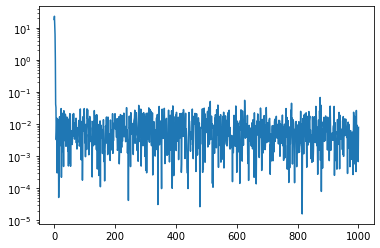